In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization settings
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 100

# Data Loading
df = pd.read_csv('Netflix Dataset.csv')

# --- Data Cleaning ---

# Date Cleaning and Deriving 'Year_Added'
df['Release_Date'] = df['Release_Date'].astype(str).str.strip() # Remove spaces (Error Fix)
df.dropna(subset=['Release_Date'], inplace=True)
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')
df.dropna(subset=['Release_Date'], inplace=True)
df['Year_Added'] = df['Release_Date'].dt.year.astype(int)

# Missing Value Imputation (Filling with 'Unknown'/'unknown' and dropping 'Rating')
df.fillna({'Director':'Unknown'},inplace=True)
df.fillna({'Cast':'unknown'},inplace=True)
df.fillna({'Country':'unknown'},inplace=True)
df.dropna(subset=['Rating'],inplace=True)

print("### 1. DATA CLEANING SUMMARY ###")
print("Missing values check after Imputation (All should be 0):")
print(df.isnull().sum().to_markdown(numalign="left", stralign="left"))
print(f"\nFinal Total Rows for Analysis: {len(df)}")

### 1. DATA CLEANING SUMMARY ###
Missing values check after Imputation (All should be 0):
|              | 0   |
|:-------------|:----|
| Show_Id      | 0   |
| Category     | 0   |
| Title        | 0   |
| Director     | 0   |
| Cast         | 0   |
| Country      | 0   |
| Release_Date | 0   |
| Rating       | 0   |
| Duration     | 0   |
| Type         | 0   |
| Description  | 0   |
| Year_Added   | 0   |

Final Total Rows for Analysis: 7772


### 2. CONTENT TYPE DISTRIBUTION (MOVIES VS TV SHOWS) ###


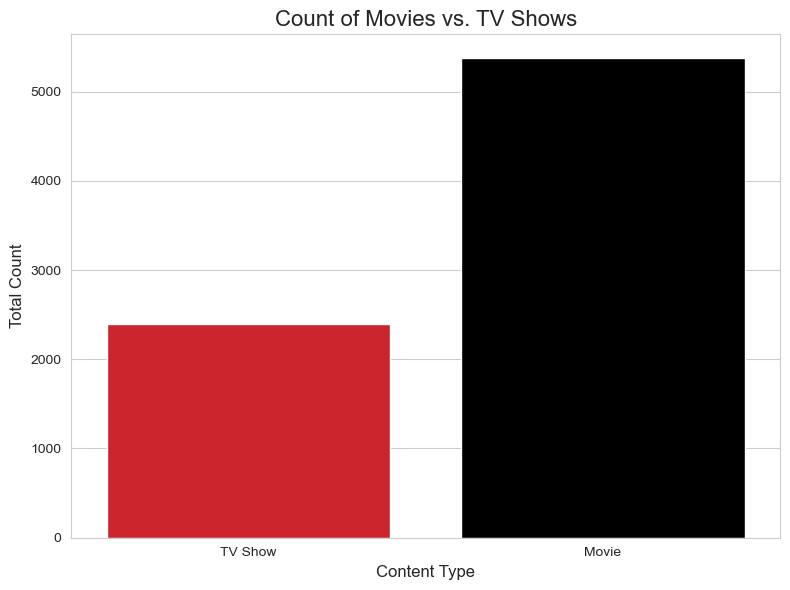


**Insight:** Movies are the dominant content type, highlighting a higher volume in the acquisition strategy.


In [19]:
# --- 2.1 Content Type Distribution (Movies vs. TV Shows) ---
print("### 2. CONTENT TYPE DISTRIBUTION (MOVIES VS TV SHOWS) ###")

plt.figure(figsize=(8, 6))
# 'Category' column mein Movie aur TV Show ka count.
sns.countplot(x='Category', data=df, hue='Category', palette=['#E50914', '#000000'], legend=False)

plt.title('Count of Movies vs. TV Shows', fontsize=16)
plt.xlabel('Content Type', fontsize=12)
plt.ylabel('Total Count', fontsize=12)
plt.tight_layout()
plt.savefig('9_Category_Count.png')
plt.show()

print("\n**Insight:** Movies are the dominant content type, highlighting a higher volume in the acquisition strategy.")

### 3. ANNUAL CONTENT ADDITION TREND ###


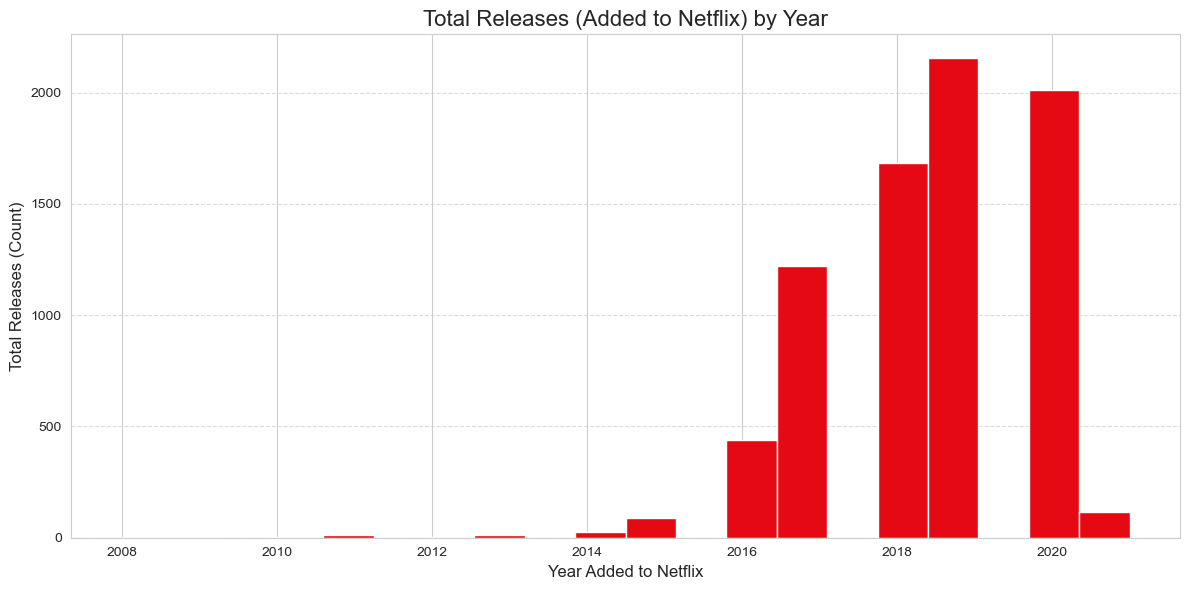


**Insight:** The period from 2017 to 2019 saw the highest volume of content added to the platform.


In [5]:
# --- 2.2 Annual Content Addition Trend ---
print("### 3. ANNUAL CONTENT ADDITION TREND ###")

plt.figure(figsize=(12, 6))
df['Year_Added'].hist(bins=20, color='#E50914')

plt.title('Total Releases (Added to Netflix) by Year', fontsize=16)
plt.xlabel("Year Added to Netflix", fontsize=12)
plt.ylabel("Total Releases (Count)", fontsize=12)
plt.grid(axis='y', alpha=0.7, linestyle='--')
plt.tight_layout()
plt.savefig('10_Year_Added_Histogram.png')
plt.show()

print("\n**Insight:** The period from 2017 to 2019 saw the highest volume of content added to the platform.")

### 4. TOP DIRECTORS ANALYSIS ###
--- Data Table: Top 10 Directors ---
| Director               | count   |
|:-----------------------|:--------|
| Raúl Campos, Jan Suter | 18      |
| Marcus Raboy           | 16      |
| Jay Karas              | 14      |
| Cathy Garcia-Molina    | 13      |
| Jay Chapman            | 12      |
| Youssef Chahine        | 12      |
| Martin Scorsese        | 12      |
| Steven Spielberg       | 10      |
| David Dhawan           | 9       |
| Robert Rodriguez       | 8       |


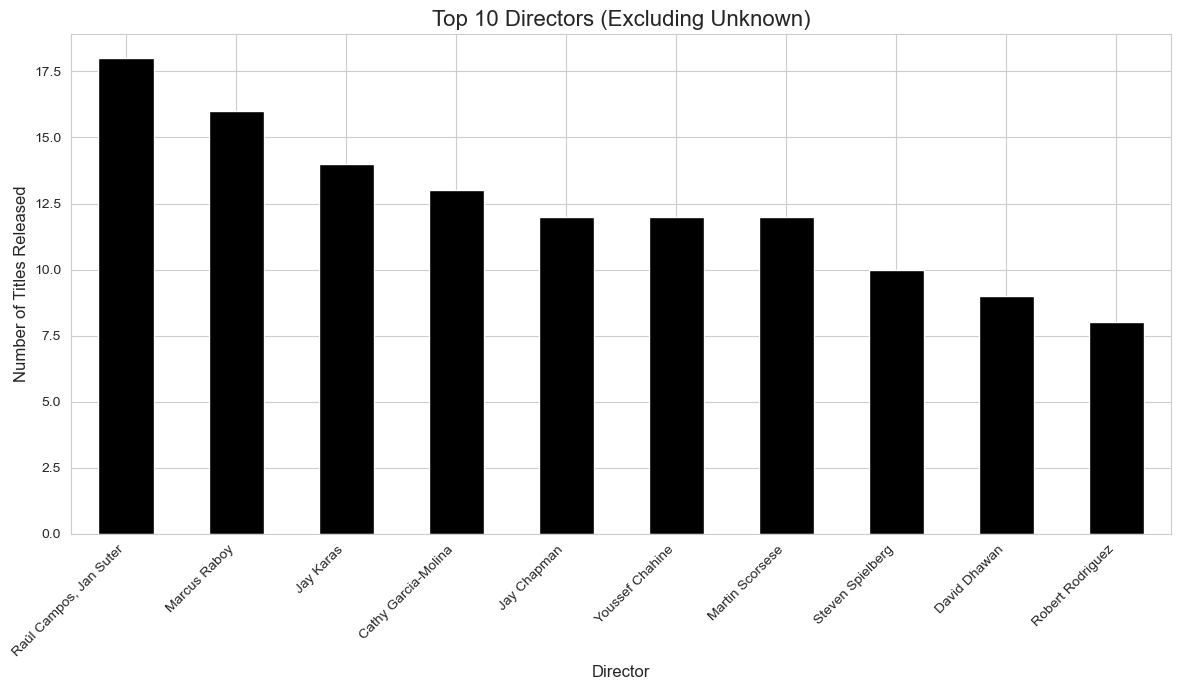


**Insight:** Raúl Campos, Jan Suter, and Marcus Raboy are among the most prolific creators on Netflix.


In [7]:
# --- 2.3 Top Directors (Content Volume) ---
print("### 4. TOP DIRECTORS ANALYSIS ###")

top_directors=df['Director'].value_counts().head(11) 
top_directors = top_directors.drop('Unknown', errors='ignore')

print("--- Data Table: Top 10 Directors ---")
print(top_directors.to_markdown(numalign="left", stralign="left"))

plt.figure(figsize=(12, 7))
top_directors.plot(kind='bar', color='#000000')

plt.title('Top 10 Directors (Excluding Unknown)', fontsize=16)
plt.xlabel("Director", fontsize=12)
plt.ylabel("Number of Titles Released", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('11_Top_Directors_Bar.png')
plt.show()

print("\n**Insight:** Raúl Campos, Jan Suter, and Marcus Raboy are among the most prolific creators on Netflix.")

### 5. TOP CONTRIBUTING COUNTRIES (PIE CHART) ###
--- Data Table: Top 10 Contributing Countries ---
| Country        | count   |
|:---------------|:--------|
| United States  | 2547    |
| India          | 923     |
| United Kingdom | 396     |
| Japan          | 224     |
| South Korea    | 183     |
| Canada         | 177     |
| Spain          | 134     |
| France         | 115     |
| Egypt          | 101     |
| Mexico         | 100     |


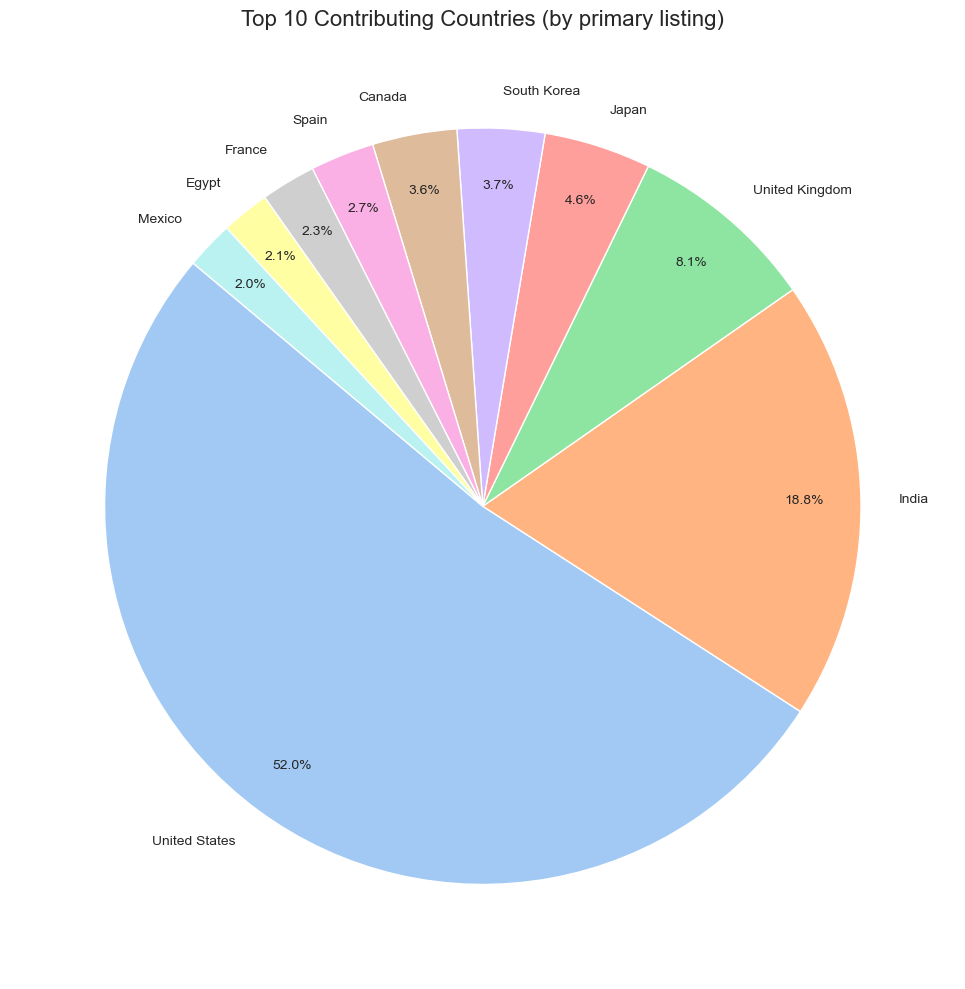


**Insight:** United States dominates the catalog, followed by India and the United Kingdom.


In [13]:
# --- 2.4 Top 10 Contributing Countries (Primary Listing) ---
print("### 5. TOP CONTRIBUTING COUNTRIES (PIE CHART) ###")

df_country = df['Country'].value_counts().head(11)
df_country = df_country.drop('unknown', errors='ignore')

print("--- Data Table: Top 10 Contributing Countries ---")
print(df_country.to_markdown(numalign="left", stralign="left"))

# Visualization (Pie Chart)
plt.figure(figsize=(10, 10))
plt.pie(
    df_country.values, 
    labels=df_country.index, 
    autopct='%1.1f%%', 
    startangle=140,
    pctdistance=0.85,
    colors=sns.color_palette('pastel')
)

plt.title('Top 10 Contributing Countries (by primary listing)', fontsize=16)
plt.tight_layout()
plt.savefig('13_Top_Countries_Pie.png')
plt.show()

print("\n**Insight:** United States dominates the catalog, followed by India and the United Kingdom.")